# Final Project: Building a Credit Approval Model using Neural Networks

In [115]:
import pandas as pd
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score 
import warnings
warnings.simplefilter("ignore")
import itertools
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [116]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [117]:
print(tf.__version__)

2.3.0


# Reading data info

In [118]:
filereader=open('crx.names')
lines=filereader.readlines()
datainfo=[]
for line in lines:
    line=line.strip('\n')
    datainfo.append(line)
datainfo 

['',
 '1. Title: Credit Approval',
 '',
 '2. Sources: ',
 '    (confidential)',
 '    Submitted by quinlan@cs.su.oz.au',
 '',
 '3.  Past Usage:',
 '',
 '    See Quinlan,',
 '    * "Simplifying decision trees", Int J Man-Machine Studies 27,',
 '      Dec 1987, pp. 221-234.',
 '    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992',
 '  ',
 '4.  Relevant Information:',
 '',
 '    This file concerns credit card applications.  All attribute names',
 '    and values have been changed to meaningless symbols to protect',
 '    confidentiality of the data.',
 '  ',
 '    This dataset is interesting because there is a good mix of',
 '    attributes -- continuous, nominal with small numbers of',
 '    values, and nominal with larger numbers of values.  There',
 '    are also a few missing values.',
 '  ',
 '5.  Number of Instances: 690',
 '',
 '6.  Number of Attributes: 15 + class attribute',
 '',
 '7.  Attribute Information:',
 '',
 '    A1:\tb, a.',
 '    A2:\tcontinuous.',
 '

# Data Preparation:

1) [15 Pts] Data Preparation: Download the dataset, load it into a pandas data frame, and prepare it for analysis. Write the resulting pandas data frame to a csv file(yourAndrewId_project.csv).

In [119]:
crx_df=pd.read_csv('crx.data', sep=',',header=None)
crx_df.rename(columns = {0:'A1',1:'A2',2:'A3',3:'A4',4:'A5',5:'A6',6:'A7',7:'A8',8:'A9',9:'A10',10:'A11',11:'A12',12:'A13',13:'A14',14:'A15',15:'A16'}, inplace = True)

In [120]:
#crx_df.to_csv('pmanzi_project.csv',index=False)

# Exploratory Data Analysis (EDA)

Use numpy, pandas, and matplotlib to perform EDA on the data. This should include identifying the presence of missing values (if any), creating visualizations with the data, and identifying presence of outliers (if any).

In [121]:
crx_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [122]:
crx_df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [123]:
crx_df.tail(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [124]:
crx_df.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
99,a,28.50,1.000,u,g,q,v,1.0,t,t,2,t,g,00167,500,-
2,a,24.50,0.500,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
451,b,39.50,1.625,u,g,c,v,1.5,f,f,0,f,g,00000,316,-
658,a,15.75,0.375,u,g,c,v,1.0,f,f,0,f,g,00120,18,-
168,b,36.67,3.250,u,g,q,h,9.0,t,f,0,t,g,00102,639,+


In [125]:
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [126]:
# plt.figure(figsize=(15, 7))
# sns.displot(crx_df, x="A2")
# plt.show()

In [127]:
columns=list(crx_df.columns)
for column in columns:
    print(crx_df[column].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64
?        12
22.67     9
20.42     7
22.50     6
24.50     6
         ..
36.42     1
44.00     1
56.75     1
38.42     1
41.50     1
Name: A2, Length: 350, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
22.290     1
8.460      1
1.290      1
14.585     1
18.500     1
Name: A3, Length: 215, dtype: int64
u    519
y    163
?      6
l      2
Name: A4, dtype: int64
g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64
0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
0.795     1
2.165     1
9.460     1
0.460     1
5.375     1
Name: A8, Length: 132, dtype: int64
t    361
f    329

In [128]:
crx_df.describe() 

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


# 3) Preprocessing, Feature Selection and Engineering: also EDA continue

This should make your data ready for building machine learning models. Using pandas and scikit-learn:
a) [10 Pts] Handle missing values and outliers (if any), and
2
b) [25 Pts] Perform appropriate label encoding (for categorical attributes) and data scaling (if needed).

In [129]:
#columns with missing values ---also A14 but will deal with it differently

In [130]:
NanColumns=['A1','A2','A4','A5','A6','A7']

In [131]:
for column in NanColumns:
    print(crx_df[column].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64
?        12
22.67     9
20.42     7
22.50     6
24.50     6
         ..
36.42     1
44.00     1
56.75     1
38.42     1
41.50     1
Name: A2, Length: 350, dtype: int64
u    519
y    163
?      6
l      2
Name: A4, dtype: int64
g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64


In [132]:
#calculating mean for column A2 which will replace null values

In [133]:
a2=crx_df['A2']
a2float=[]
for x in a2:
    if x=='?':
        continue
    x=float(x) 
    a2float.append(x)
    
meana2=np.mean(np.array(a2float))   

In [134]:
#calculating mean for column A14 which will replace null values

In [135]:
a14=crx_df['A14']
a14int=[]
for i in a14:
    if i == '?':
        continue
    i=int(i)
    a14int.append(i)
    
meana14=int(np.mean(np.array(a14int)))

In [136]:
#replacing missing values with mean for colmmn A14

In [137]:
crx_df['A14']=crx_df['A14'].replace(r'[#,@,&,?]',meana14,regex=True)
print(crx_df['A14'].value_counts())

00000    132
00120     35
00200     35
00160     34
00080     30
        ... 
00211      1
00455      1
00163      1
00369      1
00239      1
Name: A14, Length: 171, dtype: int64


In [138]:
#replacing other missing values(the ones represented by regular expressions '?' with mode and other with mean)

In [139]:
for column in NanColumns:
    mode=crx_df[column].mode()[0]
    if mode!='?':
        crx_df[column]=crx_df[column].replace(r'[#,@,&,?]',mode,regex=True)
        print(crx_df[column].value_counts())
    crx_df[column]=crx_df[column].replace(r'[#,@,&,?]',meana2,regex=True)
    print(crx_df[column].value_counts())    

b    480
a    210
Name: A1, dtype: int64
b    480
a    210
Name: A1, dtype: int64
31.56817109144543    12
22.67                 9
20.42                 7
18.83                 6
19.17                 6
                     ..
36.42                 1
44.00                 1
56.75                 1
38.42                 1
41.50                 1
Name: A2, Length: 350, dtype: int64
u    525
y    163
l      2
Name: A4, dtype: int64
u    525
y    163
l      2
Name: A4, dtype: int64
g     525
p     163
gg      2
Name: A5, dtype: int64
g     525
p     163
gg      2
Name: A5, dtype: int64
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o     

In [140]:
#converting column A14 to int
crx_df["A14"] = crx_df["A14"].astype(str).astype(int)

In [141]:
#converting column A2 to Float
crx_df["A2"] = crx_df["A2"].astype(str).astype(float)

In [142]:
#verify data types and missing data
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    int32  
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(10)
memory usage: 83.7+ KB


# visualizations with the data with purpose to detect outliers

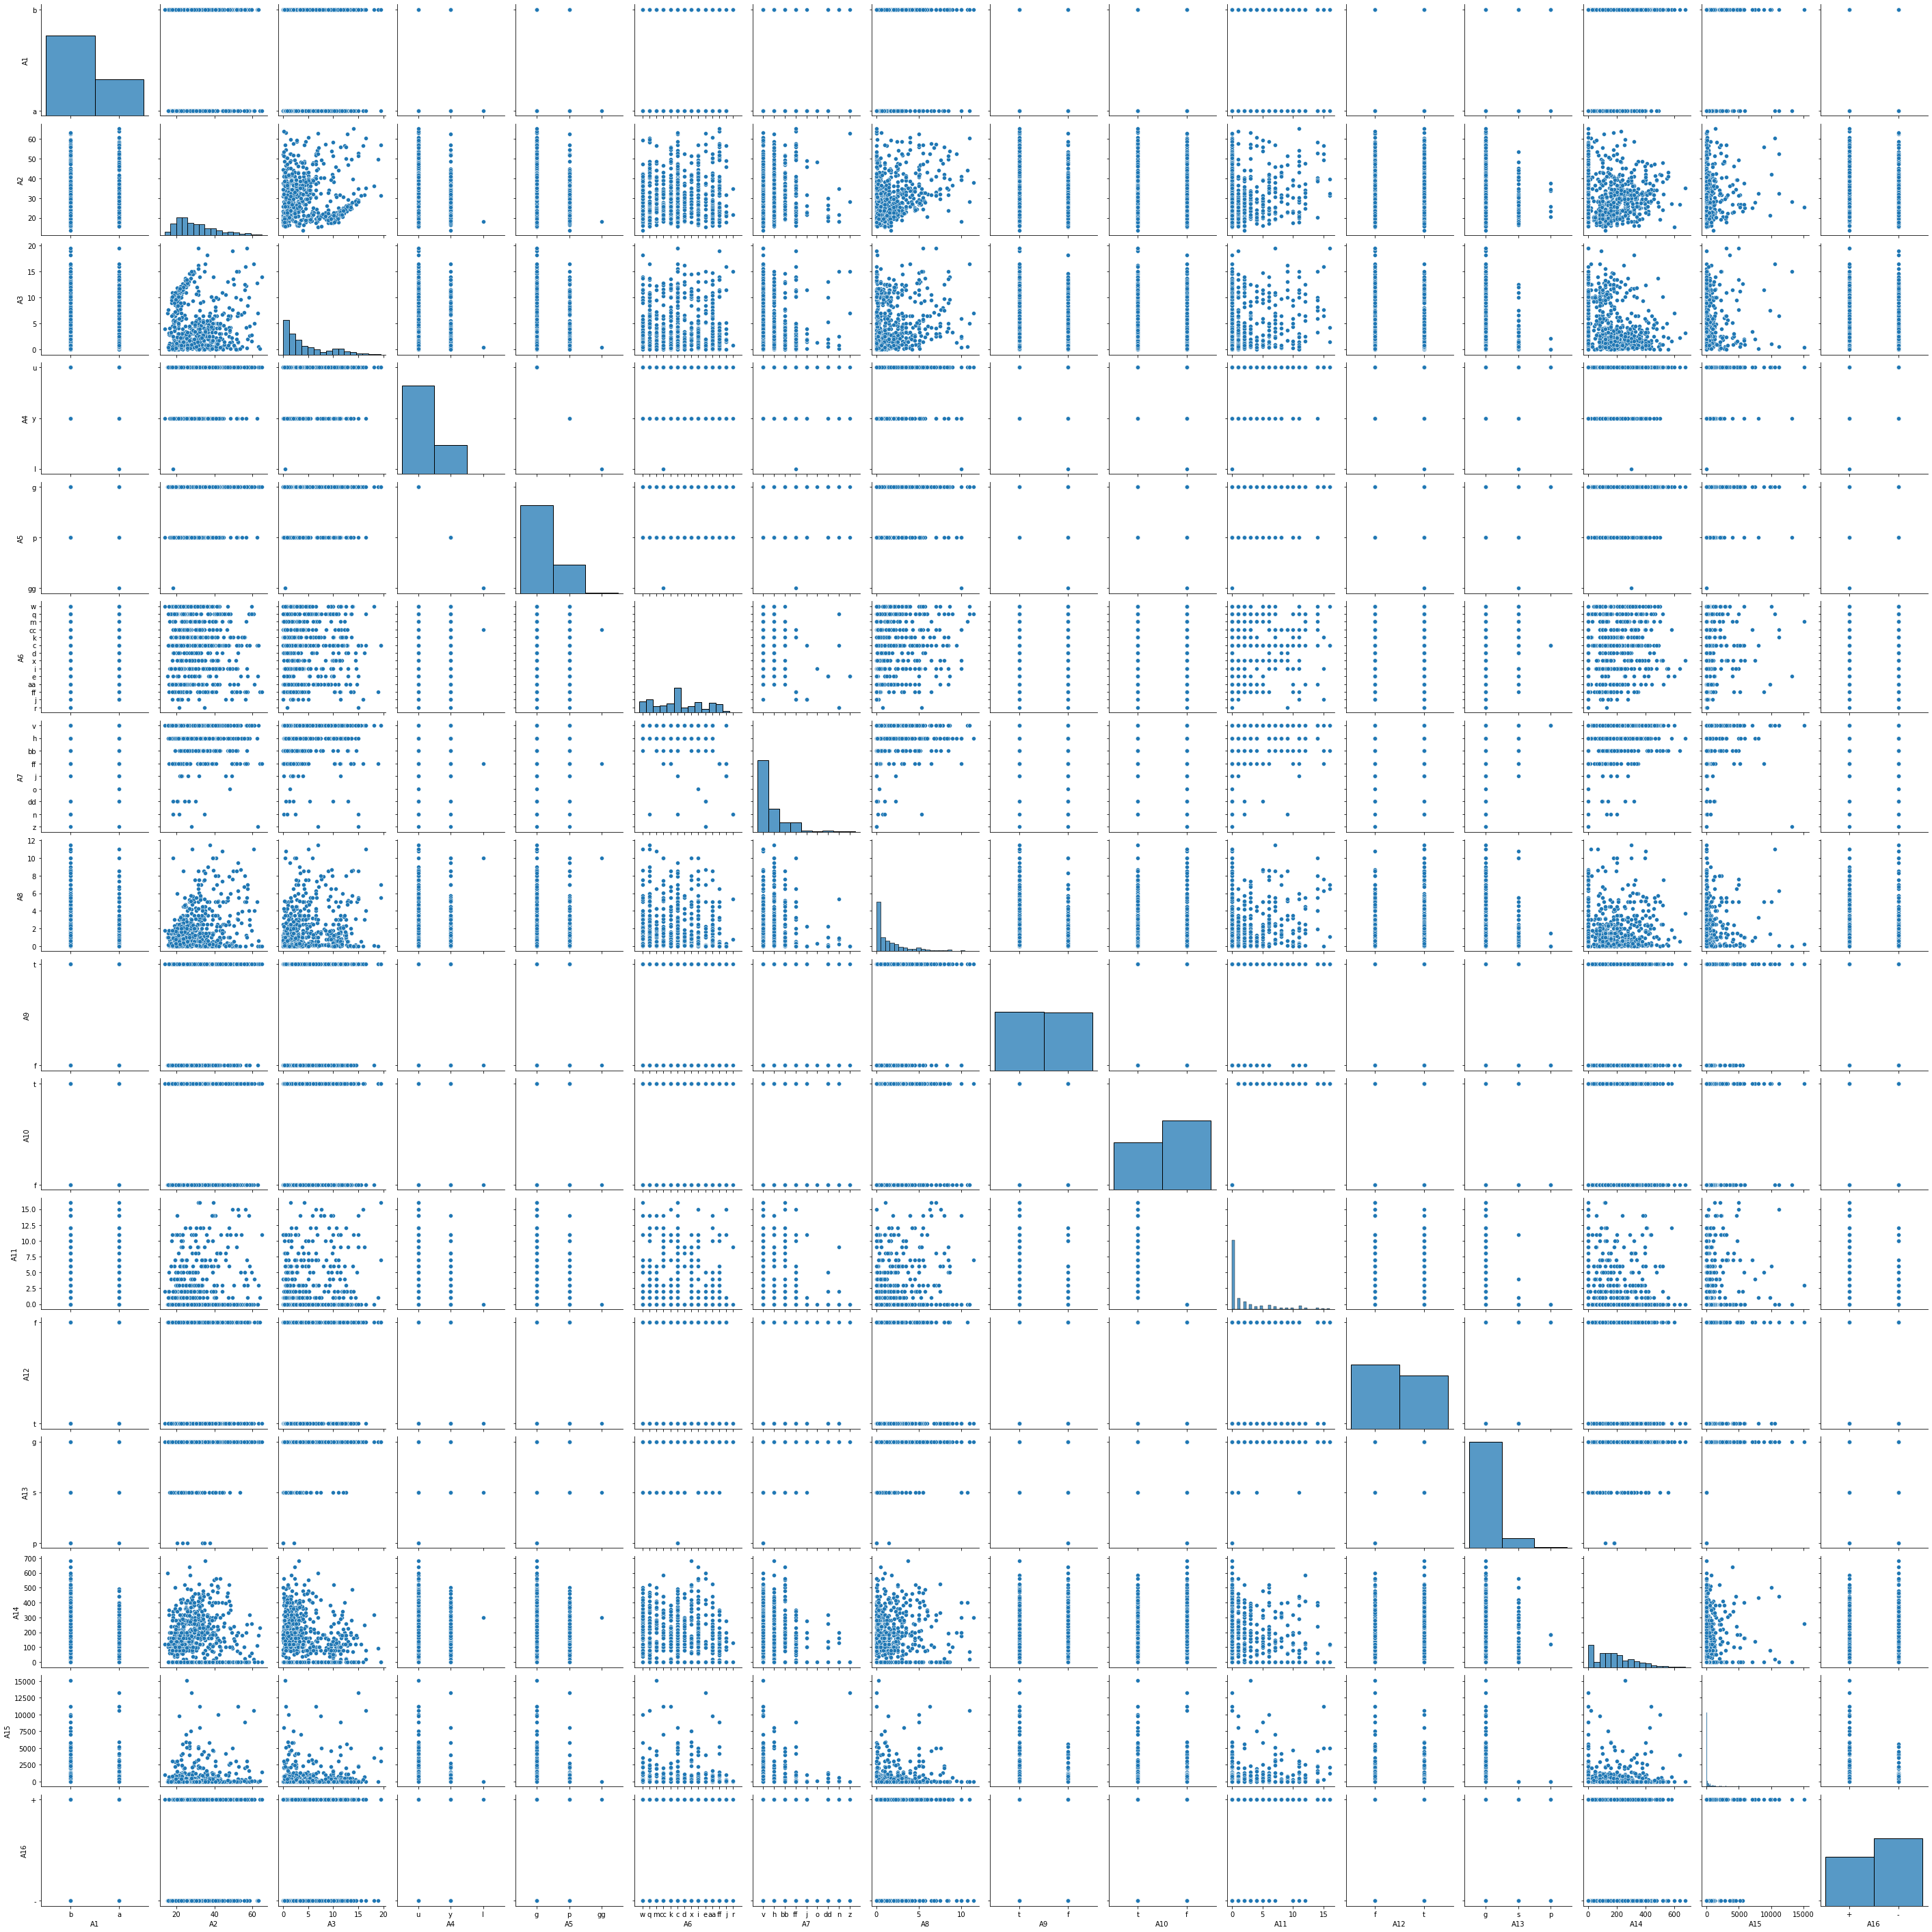

In [161]:
#Pairwise analysis
sns.pairplot(data=crx_df, vars=columns)
plt.show()

# Uni-variate(one variable outlier analysis)

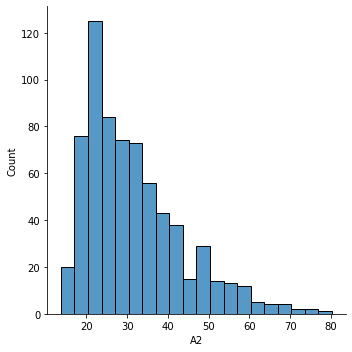

In [144]:
#Lets look at A2 data distribution
sns.displot(crx_df, x="A2")
plt.show()

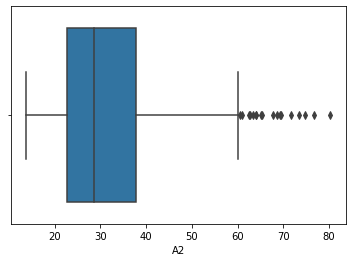

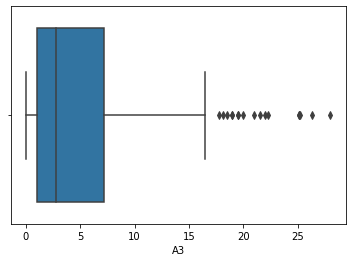

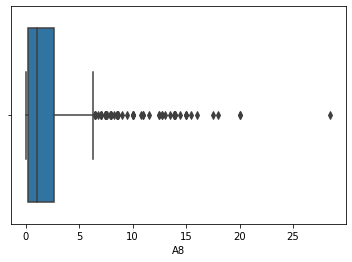

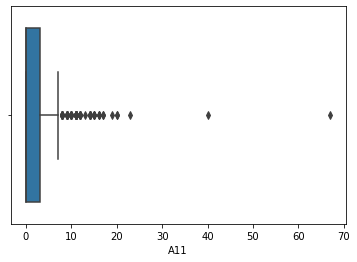

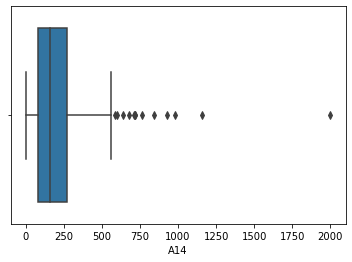

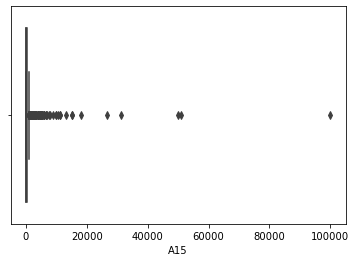

In [145]:
none_categorical=['A2','A3','A8','A11','A14','A15']
for icol in none_categorical:
    sns.boxplot(crx_df[icol])
    plt.show()
    
    

# Multi-variate(two or more variable outlier analysis)

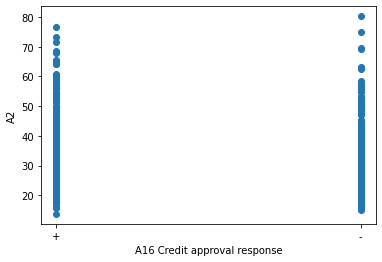

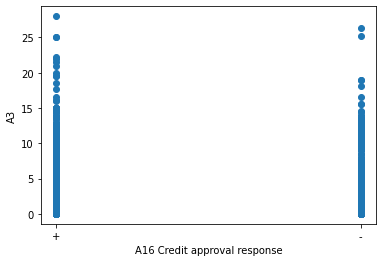

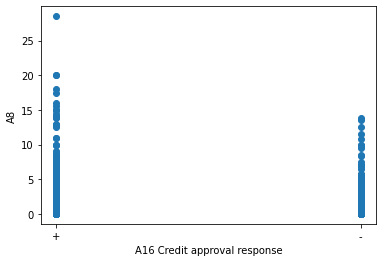

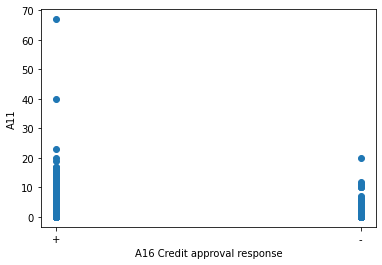

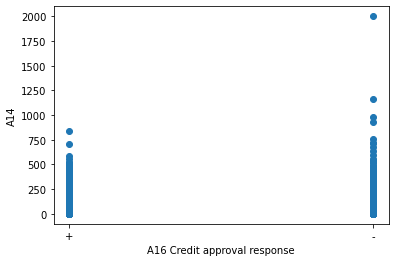

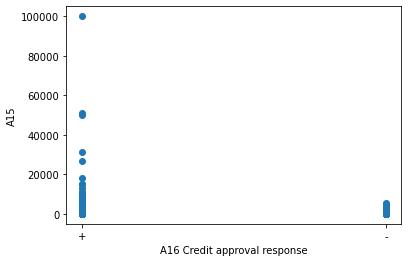

In [146]:
for icol in none_categorical:
    plt.scatter(crx_df['A16'],crx_df[icol])
    plt.xlabel('A16 Credit approval response')
    plt.ylabel(icol)
    #plt.xticks([0,1])
    plt.show()

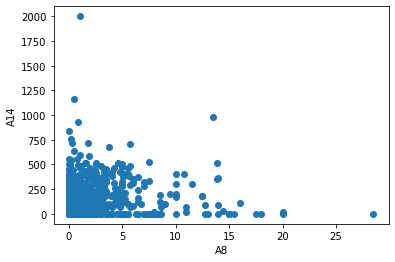

In [147]:
plt.scatter(crx_df['A8'],crx_df['A14'])
plt.xlabel('A8')
plt.ylabel('A14')
plt.show()

# Tracing and removing the outliers using z-score

#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#Discover outliers with mathematical function Z-Score-

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers

In [148]:
crx_df=crx_df.reset_index()

In [149]:
none_categorical=['A2','A3','A8','A11','A14','A15']
from scipy import stats

In [150]:
#We gonna use Z-score function defined in scipy library to detect the outliers
z = np.abs(stats.zscore(crx_df[none_categorical]))
print(z)

[[0.0623209  0.95661321 0.29108264 0.28810053 0.10454595 0.19541334]
 [2.28810134 0.06005053 0.24419044 0.74082993 0.81968741 0.08785188]
 [0.59673802 0.8561017  0.21632383 0.49388662 0.55794344 0.03714433]
 ...
 [0.53341846 1.7571976  0.06680621 0.28810053 0.09292037 0.19522126]
 [1.15226167 0.91540349 0.65291528 0.49388662 0.55794344 0.05135781]
 [0.28973588 0.27816051 1.81412545 0.49388662 1.06963731 0.19541334]]


In [151]:
#Let’s try and define a threshold to identify an outlier i.e the output can show us rows and colums that have outliers
threshold = 3
print(np.where(z > 3))

(array([  6,  20,  27,  27,  39,  44,  44,  44,  46,  58,  65,  69,  71,
        72,  72,  86, 105, 118, 121, 130, 130, 132, 157, 171, 180, 180,
       185, 197, 205, 206, 212, 221, 231, 234, 241, 243, 245, 246, 250,
       250, 296, 297, 305, 317, 317, 327, 365, 392, 405, 407, 485, 507,
       529, 529, 539, 549, 550, 550, 550, 564, 572, 585, 586, 586],
      dtype=int64), array([5, 3, 2, 3, 2, 1, 2, 3, 3, 4, 5, 1, 2, 2, 4, 4, 3, 2, 3, 0, 2, 5,
       0, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 1, 1, 5, 5, 2, 1, 2, 0, 4, 1, 1,
       5, 4, 2, 4, 0, 4, 0, 3, 1, 4, 0, 2, 0, 1, 2, 2, 4, 0, 1, 2],
      dtype=int64))


In [152]:
#we want to remove or filter the outliers and get the clean data
crx_df_o = crx_df[none_categorical][(z < 3).all(axis=1)]

In [153]:
crx_df_o.shape

(638, 6)

In [154]:
crx_df_o

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1,202,0
1,58.67,4.460,3.04,6,43,560
2,24.50,0.500,1.50,0,280,824
3,27.83,1.540,3.75,5,100,3
4,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260,0
686,22.67,0.750,2.00,2,200,394
687,25.25,13.500,2.00,1,200,1
688,17.92,0.205,0.04,0,280,750


In [155]:
crx_df_o=crx_df_o.reset_index()

In [156]:
crx_df_o

,index,A2,A3,A8,A11,A14,A15
0,0,30.83,0.000,1.25,1,202,0
1,1,58.67,4.460,3.04,6,43,560
2,2,24.50,0.500,1.50,0,280,824
3,3,27.83,1.540,3.75,5,100,3
4,4,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...,...
633,685,21.08,10.085,1.25,0,260,0
634,686,22.67,0.750,2.00,2,200,394
635,687,25.25,13.500,2.00,1,200,1
636,688,17.92,0.205,0.04,0,280,750


In [157]:
# using .merge() function to put data together
crx_df=pd.merge(crx_df.drop(none_categorical,axis=1),crx_df_o,on='index')

In [158]:
crx_df=crx_df.drop('index', axis=1)

In [159]:
crx_df

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
0,b,u,g,w,v,t,t,f,g,+,30.83,0.000,1.25,1,202,0
1,a,u,g,q,h,t,t,f,g,+,58.67,4.460,3.04,6,43,560
2,a,u,g,q,h,t,f,f,g,+,24.50,0.500,1.50,0,280,824
3,b,u,g,w,v,t,t,t,g,+,27.83,1.540,3.75,5,100,3
4,b,u,g,w,v,t,f,f,s,+,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,b,y,p,e,h,f,f,f,g,-,21.08,10.085,1.25,0,260,0
634,a,u,g,c,v,f,t,t,g,-,22.67,0.750,2.00,2,200,394
635,a,y,p,ff,ff,f,t,t,g,-,25.25,13.500,2.00,1,200,1
636,b,u,g,aa,v,f,f,f,g,-,17.92,0.205,0.04,0,280,750


In [160]:
print('*'*40+'End of outlier removal'+'*'*50)

****************************************End of outlier removal**************************************************


# Label encoding

In [46]:
#Encoding some columns
encodecolumns=['A1','A9','A10','A12','A16']
onehotcols=['A4','A5','A6','A7','A13']

In [47]:
#Transform label to numerical
encodelabel=LabelEncoder()
for col in encodecolumns:
    crx_df[col]=encodelabel.fit_transform(crx_df[col])
    print(col,':',encodelabel.classes_)

A1 : ['a' 'b']
A9 : ['f' 't']
A10 : ['f' 't']
A12 : ['f' 't']
A16 : ['+' '-']


In [48]:
encoded=pd.get_dummies(data=crx_df[onehotcols],prefix=onehotcols)

In [49]:
crx_df=pd.concat([crx_df.drop(onehotcols,axis=1),encoded],axis=1)

In [50]:
crx_df

,A1,A9,A10,A12,A16,A2,A3,A8,A11,A14,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,1,1,1,0,0,30.83,0.000,1.25,1,202,...,0,0,0,0,0,1,0,1,0,0
1,0,1,1,0,0,58.67,4.460,3.04,6,43,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,24.50,0.500,1.50,0,280,...,0,1,0,0,0,0,0,1,0,0
3,1,1,1,1,0,27.83,1.540,3.75,5,100,...,0,0,0,0,0,1,0,1,0,0
4,1,1,0,0,0,20.17,5.625,1.71,0,120,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1,0,0,0,1,21.08,10.085,1.25,0,260,...,0,1,0,0,0,0,0,1,0,0
634,0,0,1,1,1,22.67,0.750,2.00,2,200,...,0,0,0,0,0,1,0,1,0,0
635,0,0,1,1,1,25.25,13.500,2.00,1,200,...,1,0,0,0,0,0,0,1,0,0
636,1,0,0,0,1,17.92,0.205,0.04,0,280,...,0,0,0,0,0,1,0,1,0,0


In [51]:
print('*'*40+'End of label encoding'+'*'*50)

****************************************End of label encoding**************************************************


# Scaling continous variables

In [52]:
#Scaling all variables that are not categorical i.e Scale the data to a reasonable range to reduce potential for bias

In [53]:
none_categorical=['A2','A3','A8','A11','A14','A15']

In [54]:
scaler=StandardScaler()
non_categorical_df=crx_df[none_categorical]
non_categorical_df=scaler.fit_transform(non_categorical_df)

In [55]:
for (n,a) in zip(list(range(6)),none_categorical):
    crx_df[a]=non_categorical_df[:,n]
    

In [56]:
print('*'*40+'End of scaling'+'*'*50)

****************************************End of scaling**************************************************


# Finally lets create a dataframe that can be used for analysis

In [57]:
crx_df.to_csv('pmanzi_project.csv',index=False)

# 4) Model creation and evaluation:

In [58]:
X=crx_df.drop('A16', axis=1)
y=crx_df['A16']

In [59]:
#X=X.astype('float32')

In [60]:
np.dtype(y)

dtype('int32')

In [61]:
#train test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((510, 42), (128, 42), (510,), (128,))

In [63]:
num_features=X_train.shape[1]
num_features

42

In [64]:
#Determine the number of classes that the clients can be classifed into
n_classes = len(np.unique(y))
n_classes

2

# a) [20 Pts] Using scikit-learn, build a neural network-based model and perform evaluation using 10-fold cross validation. Your model should be multi-layer. Provide results using two performance metrics (of your choice). Justify the choice of metrics

In [65]:
#Creating deeplearning model
from sklearn.neural_network import MLPClassifier

In [66]:
clf = MLPClassifier(activation='relu',solver='adam', random_state=1,max_iter=41) #hidden_layer_sizes=(100,2)

In [67]:
#Fitting the training data to the network
clf.fit(X_train, y_train)

MLPClassifier(max_iter=41, random_state=1)

In [68]:
#Predicting y for X_val
y_pred = clf.predict(X_test)

In [69]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

In [70]:
#use accuracy to evaluate model
accuracies_a = cross_val_score(clf, X, y, scoring='accuracy',cv=cv, n_jobs=-1)

In [71]:
accuracy_a=np.mean(accuracies_a)
accuracy_a

0.8494047619047619

In [72]:
#use F1-score macro to evaluate model
f1scores_a = cross_val_score(clf, X, y, scoring='f1_macro',cv=cv, n_jobs=-1)

In [73]:
f1score_a=np.mean(f1scores_a)
f1score_a

0.8416617831012434

In [74]:
#Definitions of used metrics

Accuracy is the fraction of predictions our model got right or Accuracy = Number of correct predictions Total number of predictions. this means that our model is accurate at 84.94%

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. this means that the weighted average of Precision and Recall of our model is higher (0.8416) which means good model

# b) [30 Pts] Using hyperparameter tuning (with Grid Search), and based on 10-fold cross-validation, identify the combination of hyperparameters that gives the best estimator on the dataset. Your search space for hyperparameters must include at least three hyperparameters - selected from learning rate, epochs, activation function, optimizer, batch-size, among others

In [75]:
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV

In [76]:
parameters = {'solver': ['lbfgs', 'sgd', 'adam'],
              'max_iter': [10,30,90],
              'hidden_layer_sizes':np.arange(5, 12),
              'activation':['identity', 'logistic', 'tanh', 'relu']
             }
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

In [77]:
gd_search=clf_grid.fit(X_train,y_train)

In [78]:
gd_search.best_estimator_

MLPClassifier(activation='identity', hidden_layer_sizes=8, max_iter=90,
              solver='lbfgs')

In [79]:
bestclassifier=MLPClassifier(activation='identity', hidden_layer_sizes=11, max_iter=90,solver='lbfgs')

In [80]:
bestclassifier.fit(X_train,y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=11, max_iter=90,
              solver='lbfgs')

In [81]:
y_pred=bestclassifier.predict(X_test)

In [82]:
accuracies_b = cross_val_score(bestclassifier, X, y, scoring='accuracy',cv=cv, n_jobs=-1)
accuracy_b=np.mean(accuracies_b)
accuracy_b

0.851016865079365

In [83]:
f1scores_b = cross_val_score(bestclassifier, X, y, scoring='f1_macro',cv=cv, n_jobs=-1)
f1score_b=np.mean(f1scores_b)
f1score_b

0.8457707935573493

# c) [10 Pts] Compare the performance of the tuned model in b) against that in the model in a). Use visualizations to highlight the comparison.

In [84]:
f1_scores={"Model A":f1score_a, "Model B":f1score_b}

In [85]:
accuracy_scores={"Model A":accuracy_a, "Model B":accuracy_b}

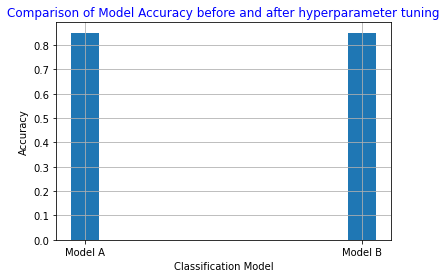

In [86]:
# Plot the graph of Accuracies
models=list(accuracy_scores.keys())
modelAccuracy=list(accuracy_scores.values())
plt.bar(models, modelAccuracy, width = 0.1)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Accuracy", color='black')
plt.title("Comparison of Model Accuracy before and after hyperparameter tuning", color='blue')
plt.grid()
plt.show()

In [87]:
modelAccuracy

[0.8494047619047619, 0.851016865079365]

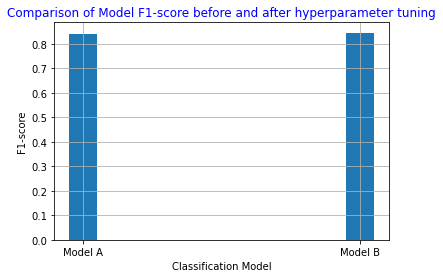

In [88]:
# Plot the graph of f1-score
models=list(f1_scores.keys())
modelScores=list(f1_scores.values())
plt.bar(models, modelScores, width = 0.1)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("F1-score", color='black')
plt.title("Comparison of Model F1-score before and after hyperparameter tuning", color='blue')
plt.grid()
plt.show()

In [89]:
modelScores

[0.8416617831012434, 0.8457707935573493]